<a href="https://colab.research.google.com/github/TectoArc/Carbon-Predictions/blob/main/N_O_Predictions_Carbon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('dark')
plt.style.use('ggplot')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [2]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df_train = pd.read_excel("Dataset_M.xlsx", skiprows=1)
df_train = df_train.drop(columns=["Reference","Sample Number"], axis=1)

X  = df_train.drop('C', axis = 1)
y = df_train['C']

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_extr = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=32, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=500, n_jobs=None, oob_score=False,
                    verbose=0, warm_start=True, random_state=100)

y_extr = model_extr.fit(X_train_scaled, y_train).predict(X_test_scaled)
X_scale = scaler.transform(X)
y_pred_extr = model_extr.predict(X_scale)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


ML Predictios for Phase Boundary Plot

In [6]:
df_N = pd.read_excel('Dataset_N_Predicted.xlsx', skiprows=1)
df_N = df_N.drop(columns=["C"], axis=1)
print(df_N.shape, df_N.columns)
df_N.head()

(101, 5) Index(['Pressure (Gpa)', 'Temperature (°C)', 'Fe', 'Ni', 'S'], dtype='object')


,Pressure (Gpa),Temperature (°C),Fe,Ni,S
0,10,1450,48.684211,51.315789,0.000000
1,10,1450,48.409064,20.690694,0.565165
2,10,1450,48.137011,20.574415,1.123978
3,10,1450,47.867998,20.459435,1.676544
4,10,1450,47.601975,20.345734,2.222969


In [7]:
df_N_scaled = scaler.transform(df_N)
y_pred_n = model_extr.predict(df_N_scaled)
N = pd.DataFrame(y_pred_n, columns=["C_Pred_N"])
df_N2 = df_N.copy()
df_N2["C_Pred_N"] = N["C_Pred_N"] 

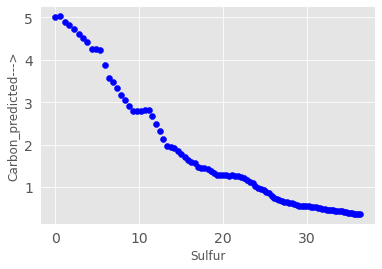

In [8]:
plt.scatter(df_N["S"], y_pred_n, color='b')
plt.ylabel('Carbon_predicted--->')
plt.xlabel('Sulfur')
plt.show()

O (New Data) predictions

In [9]:
df_O = pd.read_excel('Dataset_O.xlsx', skiprows=1)
df_O = df_O.drop(columns = ['C'], axis=1)
print(df_O.shape, df_O.columns)

(13, 5) Index(['Pressure (Gpa)', 'Temperature (°C)', 'Fe', 'Ni', 'S'], dtype='object')


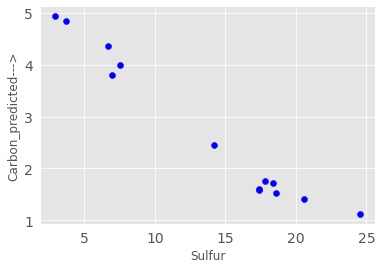

In [10]:
df_O_scaled = scaler.transform(df_O)
y_pred_o = model_extr.predict(df_O_scaled)
O = pd.DataFrame(y_pred_o, columns=["C_Pred_O"])
df_O2 = df_O.copy()
df_O2["C_Pred_O"] = O["C_Pred_O"]

plt.scatter(df_O["S"], y_pred_o, color='b')
plt.ylabel('Carbon_predicted--->')
plt.xlabel('Sulfur')
plt.show()

In [11]:
df_MC = pd.read_excel("Melt Composition.xlsx")
df_MC.head()

,Unnamed: 0,P,T,Fe,Ni,S,O
0,LP10-1450-a,10,1450,62.79,16.99,16.82,0.69
1,LP10-1450-d,10,1450,57.54,17.74,20.17,1.14
2,LG10-1450-a,10,1450,71.22,17.57,6.62,0.49
3,LG10-1450-c,10,1450,62.20,16.02,17.87,0.95
4,LG10-1450-d,10,1450,61.01,17.57,18.18,0.72


In [12]:
df_MC.rename(columns={'P' : "Pressure (Gpa)", 'T' : 'Temperature (°C)'}, inplace=True)
df_MC.head()

,Unnamed: 0,Pressure (Gpa),Temperature (°C),Fe,Ni,S,O
0,LP10-1450-a,10,1450,62.79,16.99,16.82,0.69
1,LP10-1450-d,10,1450,57.54,17.74,20.17,1.14
2,LG10-1450-a,10,1450,71.22,17.57,6.62,0.49
3,LG10-1450-c,10,1450,62.20,16.02,17.87,0.95
4,LG10-1450-d,10,1450,61.01,17.57,18.18,0.72


In [16]:
df_test = df_MC.iloc[:,1:-1]
df_test.head()

,Pressure (Gpa),Temperature (°C),Fe,Ni,S
0,10,1450,62.79,16.99,16.82
1,10,1450,57.54,17.74,20.17
2,10,1450,71.22,17.57,6.62
3,10,1450,62.20,16.02,17.87
4,10,1450,61.01,17.57,18.18


In [17]:
df_test_norm = scaler.transform(df_test)
df_test_pred = model_extr.predict(df_test_norm)
df_test["Pred"] = df_test_pred
df_test.to_excel("Melt Composition Predictions.xlsx")